`2021-04-25(일) 수정`
# 2020-09-14 뉴스기사 워드 클라우드

In [3]:
from bs4 import BeautifulSoup  # pip install bs4
from tqdm import tnrange
import urllib.request
import requests
import pandas as pd

In [4]:
#네이버 랭킹뉴스 파싱하기
url = "https://news.naver.com/main/ranking/popularDay.nhn?rankingType=popular_day&sectionId=101&date=20200610"

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.128 Safari/537.36'}

response = requests.get(url,headers=headers)
print(response)
print(response.request.headers)

<Response [200]>
{'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.128 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


In [5]:
# 기사의 url 불러오기
soup = BeautifulSoup(response.text, 'html.parser')
print('기사갯수:',len(soup.select('.list_content > a')))

article_url_plus = soup.select('.list_content > a')[0]['href']
print(article_url_plus)

기사갯수: 359
/main/ranking/read.nhn?mode=LSD&mid=shm&sid1=001&oid=032&aid=0003070915&rankingType=RANKING


In [6]:
#기사의 url을 받아 파싱하기
article_url = 'https://news.naver.com' + article_url_plus
response = requests.get(article_url,headers=headers)
news_soup = BeautifulSoup(response.text, 'html.parser')

In [7]:
#본문가져오기
news_text = news_soup.select('._article_body_contents')
#news_text[0].text.replace("\n",'')

news_text_modify = news_text[0].text.replace("\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}\n\n","") #앞의 반복문구 지우기

#str_content = 'The   quick  brown  fox  jumps   over  the  lazy dog'
result = ' '.join(news_text_modify.split())
print(result)    #// The quick brown fox jumps over the lazy dog

[경향신문] 최근 왕성한 방송 활동을 하고 있는 전 프로골퍼 박세리가 전날 코로나19 확진 판정을 받은 뮤지컬 배우 손준호와 접촉해 코로나19 양성 판정을 받은 것으로 나타났다. 배우 손씨와 같은 뮤지컬에 참여한 뮤지컬배우 겸 가수 김준수는 음성 판정을 받았다.24일 업계에 따르면 박세리는 이날 오전 코로나19 확진 판정을 받았다. 지난 21일 박세리는 자신이 진행하는 네이버나우 ‘세리자베스’ 프로그램에 게스트로 출연했던 뮤지컬 배우 손준호와 밀접 접촉했다. 손준호는 지난 23일 코로나19 확진 판정을 받았다.박세리는 “방역당국의 지침에 따라 격리에 들어갈 예정이며, 동선이 겹치거나 접촉이 있었던 모든 스태프 및 접촉자 등은 즉시 검사를 진행했거나 신속히 진행할 예정”이라고 설명했다. 회사 매니저와 직원들은 모두 음성 판정을 받았으나 혹시 모를 상황에 대비해 이들도 모든 스케줄을 중단 후 자가격리하기로 했다.박세리는 현재 E채널 예능 ‘노는 언니’와 유튜브 등에 출연하고 있어 방송에도 차질이 있을 것으로 예상된다.한편 배우 손씨와 뮤지컬 ‘드라큘라’에 함께 출연하고 ‘세리자베스’ 게스트로도 함께 참석햇던 김준수는 음성 판정을 받았다.김준수의 소속사 측은 김준수가 손준호와 밀접접촉자로 분류돼 자가격리에 들어갔으며 다음 달 5일 정오까지 모든 스케줄을 중단한다고 밝혔다.이 밖에도 ‘드라큘라’에 출연하는 신성록 역시 음성 판정을 받고 자가격리에 들어갔다. 손준호의 배우자 김소현이 출연하는 뮤지컬 ‘팬텀’의 배우·스태프·오케스트라 전원도 모두 음성 판정을 받았지만, 김소현과 전동석은 밀접 접촉자로 분류돼 향후 2주간 공연에 참여하지 않는다.모바일팀▶ [인터랙티브] 나의 탄소발자국은 얼마?▶ 경향신문 바로가기▶ 경향신문 구독신청하기©경향신문(www.khan.co.kr), 무단전재 및 재배포 금지


In [8]:
#하나의 url에서 다른 url을 들어가 다시 파싱한 후 본문을 가져왔다. for문을 사용해서 30개의 뉴스의 본문을 다 가져와보자

url = "https://news.naver.com/main/ranking/popularDay.nhn?rankingType=popular_day&sectionId=101&date=20200610"

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.128 Safari/537.36'}

response = requests.get(url,headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')


#들어갈 url 리스트 만들고 본문 가져오기
texts = []
for i in tnrange(0,30):
    article_url_plus = soup.select('.list_content > a')[i]['href']
    article_url = requests.get('https://news.naver.com' + article_url_plus, headers=headers)

    news_soups = BeautifulSoup(article_url.text, 'html.parser')
    news_text = news_soups.select('._article_body_contents')
    news_text_modify = news_text[0].text.replace("\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}\n\n","") #앞의 반복문구 지우기
    result = ' '.join(news_text_modify.split())

    texts.append(result)

<ipython-input-8-06facd8196aa>:13: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(0,30):


In [9]:
text_result = ' '.join(texts)
text_result[0:1000]

'[경향신문] 최근 왕성한 방송 활동을 하고 있는 전 프로골퍼 박세리가 전날 코로나19 확진 판정을 받은 뮤지컬 배우 손준호와 접촉해 코로나19 양성 판정을 받은 것으로 나타났다. 배우 손씨와 같은 뮤지컬에 참여한 뮤지컬배우 겸 가수 김준수는 음성 판정을 받았다.24일 업계에 따르면 박세리는 이날 오전 코로나19 확진 판정을 받았다. 지난 21일 박세리는 자신이 진행하는 네이버나우 ‘세리자베스’ 프로그램에 게스트로 출연했던 뮤지컬 배우 손준호와 밀접 접촉했다. 손준호는 지난 23일 코로나19 확진 판정을 받았다.박세리는 “방역당국의 지침에 따라 격리에 들어갈 예정이며, 동선이 겹치거나 접촉이 있었던 모든 스태프 및 접촉자 등은 즉시 검사를 진행했거나 신속히 진행할 예정”이라고 설명했다. 회사 매니저와 직원들은 모두 음성 판정을 받았으나 혹시 모를 상황에 대비해 이들도 모든 스케줄을 중단 후 자가격리하기로 했다.박세리는 현재 E채널 예능 ‘노는 언니’와 유튜브 등에 출연하고 있어 방송에도 차질이 있을 것으로 예상된다.한편 배우 손씨와 뮤지컬 ‘드라큘라’에 함께 출연하고 ‘세리자베스’ 게스트로도 함께 참석햇던 김준수는 음성 판정을 받았다.김준수의 소속사 측은 김준수가 손준호와 밀접접촉자로 분류돼 자가격리에 들어갔으며 다음 달 5일 정오까지 모든 스케줄을 중단한다고 밝혔다.이 밖에도 ‘드라큘라’에 출연하는 신성록 역시 음성 판정을 받고 자가격리에 들어갔다. 손준호의 배우자 김소현이 출연하는 뮤지컬 ‘팬텀’의 배우·스태프·오케스트라 전원도 모두 음성 판정을 받았지만, 김소현과 전동석은 밀접 접촉자로 분류돼 향후 2주간 공연에 참여하지 않는다.모바일팀▶ [인터랙티브] 나의 탄소발자국은 얼마?▶ 경향신문 바로가기▶ 경향신문 구독신청하기©경향신문(www.khan.co.kr), 무단전재 및 재배포 금지 [경향신문] 권덕철 중앙재난안전대책본부 1차장(보건복지부 장관, 오른쪽)이 지난 20일 오전 세종시 정부세종청사에서 열린 코로나19 대응 중앙재난안전대책본부 회의를 주재하며 

In [10]:
# okt 사전 실행하기 전 시스템 환경변수 설정
# https://stricky.tistory.com/398
# C:\Program Files/Java/jre1.8.0_291
# java 설치경로 
import platform 
print(platform.architecture())

#!java_home = 'C:\Program Files\Java\jdk1.8.0_291\jre\bin\server'

('64bit', 'WindowsPE')


'java_home'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [74]:
#!pip install ipykernel

In [75]:
#!pip install konlpy

from konlpy.tag import Okt

okt = Okt()

okt_pos = okt.pos(text_result)

okt_pos[0:10]

# morphs = []
#for sentence in text_result:
#    morphs.append(okt.pos(sentence))
#print(morphs)

[('[', 'Punctuation'),
 ('경향신문', 'Noun'),
 (']', 'Punctuation'),
 ('최근', 'Noun'),
 ('왕성', 'Noun'),
 ('한', 'Josa'),
 ('방송', 'Noun'),
 ('활동', 'Noun'),
 ('을', 'Josa'),
 ('하고', 'Verb')]

In [116]:
noun_adj_adv_list=[]

for i in tnrange(len(okt_pos)):
    if ('Noun' in okt_pos[i][1]) and \
    ("것" not in okt_pos[i][0]) and \
    ("내" not in okt_pos[i][0]) and \
    ("나" not in okt_pos[i][0]) and \
    ("수" not in okt_pos[i][0]) and \
    ("게" not in okt_pos[i][0]) and \
    ("말" not in okt_pos[i][0]) and \
    ("등" not in okt_pos[i][0]):
        
        noun_adj_adv_list.append(okt_pos[i][0])
        
noun_adj_adv_list[0:10]

#noun_adj_adv_list=[]
#for sentence in morphs :
#    for word, tag in sentence :
#        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word)and("등"not in word):
#            noun_adj_adv_list.append(word)
#print(noun_adj_adv_list)

<ipython-input-116-0c6e79504ee4>:3: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(len(okt_pos)):


['경향신문', '최근', '왕성', '방송', '활동', '전', '프로', '골퍼', '박세리', '전날']

In [117]:
from collections import Counter

count = Counter(noun_adj_adv_list)
words = dict(count.most_common())

In [120]:
#!pip install wordcloud

In [121]:
#워드클라우드 만들기
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
%matplotlib inline
import matplotlib
from matplotlib import rc

In [122]:
#글씨체
rc('font', family='H2HDRM')

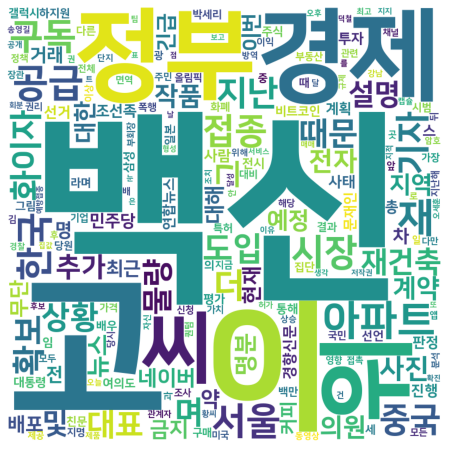

In [132]:
wc = WordCloud(
    font_path = 'D:/폰트/나눔스퀘어/TTF/NanumSquareEB.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기                               
    width = 800,
    height = 800
)

wc.generate_from_frequencies(dict(words))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(wordcloud)